In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [39]:
data = pd.read_csv("diabetes.csv",header=None)

In [40]:
data.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [41]:
data.shape

(759, 9)

In [44]:
X_train = torch.tensor(data.iloc[:500,:-1].values, dtype = torch.float)
X_test = torch.tensor(data.iloc[500:,:-1].values, dtype = torch.float)
y_train = torch.tensor(data.iloc[:500,-1].values, dtype = torch.float).reshape(-1,1)
y_test = torch.tensor(data.iloc[500:,-1].values, dtype = torch.float).reshape(-1,1)

In [45]:
X_train.shape, X_test.shape

(torch.Size([500, 8]), torch.Size([259, 8]))

# Logistic Regression Model

In [47]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.linear = torch.nn.Linear(8,1)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self,x):
        l1 = self.linear(x)
        o1 = self.sigmoid(l1)
        return o1

In [48]:
model = LogisticRegression()

In [49]:
criterion = torch.nn.BCELoss()

In [50]:
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.01)

In [51]:
epoch_list = []
train_loss = []
test_loss = []

In [52]:
for epoch in range(500):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    epoch_list.append(epoch)
    train_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    test_pred = model(X_test)
    test_l = criterion(test_pred, y_test)
    optimizer.zero_grad()
    test_loss.append(test_l)

    

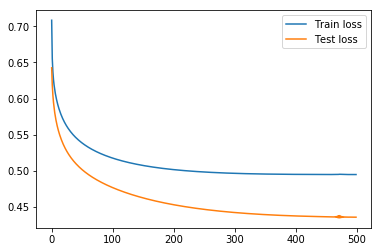

In [53]:
plt.plot(epoch_list, train_loss, label = "Train loss")
plt.plot(epoch_list, test_loss, label = "Test loss")
plt.legend()

# Test Set Accuracy

In [54]:
y_pred = model(X_test)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
y_pred = y_pred >0.5

In [57]:
accuracy_score(y_pred, y_test)

0.7915057915057915

# Now let's create wide and deep network

In [65]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.l1 = torch.nn.Linear(8,6)
        self.l2 = torch.nn.Linear(6,4)
        self.l3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
    def forward(self,x):
        o1 = self.relu(self.l1(x))
        o2 = self.relu(self.l2(o1))
        o3 = self.relu(self.l3(o2))
        return self.sigmoid(o3)

In [66]:
model = LogisticRegression()

In [67]:
criterion = torch.nn.BCELoss()

In [68]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [69]:
epoch_list = []
train_loss = []
test_loss = []

In [70]:
for epoch in range(400):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    epoch_list.append(epoch)
    train_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    test_pred = model(X_test)
    test_l = criterion(test_pred, y_test)
    optimizer.zero_grad()
    test_loss.append(test_l)

    

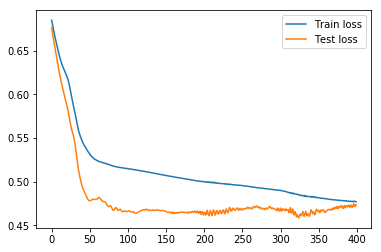

In [71]:
plt.plot(epoch_list, train_loss, label = "Train loss")
plt.plot(epoch_list, test_loss, label = "Test loss")
plt.legend()

# Test Accuracy

In [72]:
y_pred = model(X_test)

In [73]:
y_pred = y_pred >0.5

In [74]:
accuracy_score(y_pred, y_test)

0.7799227799227799